# Линейная регрессия

In [26]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

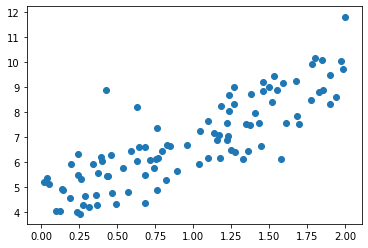

In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

# Вычисление коэффициентов многомерной линейной регрессии

Линейная регрессия, приближающая некоторую зависимость:  
<p style="text-align: center;">$\hat{y_i} = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... + \beta_n x_{n,i}$ (1)</p>
Простейший вариант:  

<p style="text-align: center;">$\hat{y_i} = \beta_0 + \beta_1 x_{i}$</p>    

Математически коэффициенты $\beta_0, \beta_1, \beta_2 ... \beta_n$  могут быть оценены с помощью формулы:    

<p style="text-align: center;">$\hat{\beta} = (X^{T}X)^{-1} X^{T}Y$</p>  

Где $X$ - матрица признаков размером $M \times N$, $M$ - количество наблюдений, $N$ - количество признаков (features). $Y$ - известная зависимая величина, которую мы хотим приблизить с помощью модели (Тоже матрица, но размером $M \times 1$).  Чтобы вычислить коэффициенты модели, необходимо ввести функцию ошибки, которую необходимо минимизировать.  
Обозначим $e_i$ как ошибку модели на точке с номером $i$, таким образом:    
<p style="text-align: center;">$e_i = y_i - \hat{y_i}$</p> 

Где $\hat{y_i}$ - моделируемый результат, $y_i$ - известный результат.    
Объявим функцию ошибки:    
<p style="text-align: center;">$\sum_{i=1}^m e_i^2 = \sum_{i=1}^m (y_i - \hat{y_i})^2$</p>  

Где $m$ - количество наблюдений.   
Модель регрессии (1) мы можем перезаписать в матричной форме:  
<p style="text-align: center;">$\hat{Y} = X\beta$</p>   

Мы знаем, что:  
<p style="text-align: center;">$\sum_{i=1}^m e_i^2 = E^{T}E$</p>  

Мы хотим минимизировать общую квадратичную ошибку, так, чтобы значение приведенного выражения, было маленьким, насколько это возможно.    
<p style="text-align: center;">$E^{T}E = (Y-\hat{Y})^{T} (Y-\hat{Y})$</p>    
Это выражение эквивалентно следующему:    
<p style="text-align: center;">$E^{T}E = (Y-X\beta)^{T} (Y-X\beta)$</p>    

Мы хотим найти значения $\beta$, при которых значения данного выражения минимально. Для этого продиффиренцируем его по $\beta$ и приравняем $0$. Используем правило дифференцирования сложной функции.    
<p style="text-align: center;">$\frac{dE^{T}E}{d\beta} = - 2 X^{T}Y + 2 X^{T}X\beta = 0$</p>  
  
Упрощаем:    

<p style="text-align: center;">$X^{T}X\beta = X^{T}Y$</p>  

Осталяем $\beta$ в левой стороне, все остальное переносим в правую часть.  В итоге, коэффициенты можно найти по формуле:    

<p style="text-align: center;">$\beta = (X^{T}X)^{-1} X^{T}Y$</p>  

Мы нашли требуемое решение, однако, с точки зрения производительности, проблемой является вычисление обратной матрицы, которое сложно произвести, если датасет большой. В этой ситуации оптимальным является к примеру стохастический градиентный спуск.  
**Дополнение. Нахождение обратной матрицы.** 
<p style="text-align: center;">$A^{-1}=\frac{1}{|A|}A_+^{T}$</p>  

Где $|A|$ - определитель матрицы $A$, $A_+^{T}$ - транспонированная матрица алгебраических дополнений.

In [40]:
# Сгенерируем точки с шумом
X = 4 * np.random.rand(100, 1)
y = 7 + 5 * X + np.random.randn(100, 1)

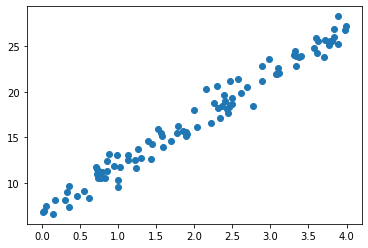

In [41]:
plt.scatter(X, y)
plt.show()

In [42]:
# Найдём коэффициенты линейной регрессии, с помощью аналитического решения, приведённого выше

# Функция np.c_ соединяет два массива как две колонки
# Добавляем x0 = 1 для каждого примера. (Данная колонка будет отвечать за коэффициент 𝛽0)
X_b = np.c_[np.ones((100, 1)), X]

beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [43]:
beta_best

array([[6.88328114],
       [5.01023548]])

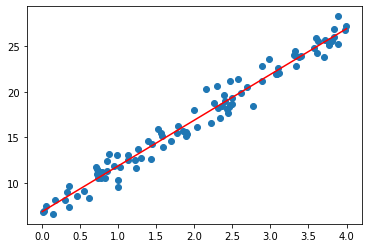

In [45]:
# Построим график восстановленной линейной регрессии

plt.scatter(X, y)

x = np.linspace(0.,4.)
plt.plot(x, beta_best[0] + x * beta_best[1], color='r')

plt.show()

In [46]:
# Обучение регрессии, с помощью библиотеки sklearn
from sklearn.linear_model import LinearRegression

X_new = np.array([[0], [2]])

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

y_pred = lin_reg.predict(X_new)
#print(y_pred)

[6.88328114] [[5.01023548]]


### Ссылки

1. Оригинал аналитического решения:
https://stats.stackexchange.com/a/46171

2. Aurélien Géron. Hands-On Machine Learning with Scikit-Learn and TensorFlow, C. 150